In [1]:
# Import Packages
"""
    numpy: lib used for working with arrays
        - contain functions for working with linear algebra, ....
    skfuzzy: packages has all functions
        - control: for define inputs/outputs/rules
"""
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [18]:
## Define Inputs/Outputs
# np.arange(0, 11): generate array [0, 1, ....., 11]
# We Deffuze By Centroid Method
foodQuality = ctrl.Antecedent(universe=np.arange(0, 11), label='foodQuality')
serviceQuality = ctrl.Antecedent(universe=np.arange(0, 11), label='serviceQuality')
tip = ctrl.Consequent(np.arange(0, 26), label="Tipping", defuzzify_method='centroid')
print(np.arange(0, 26)) # [ 0  1  2  3  4  5  ... ]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


In [ ]:
## Define MemberShip Function For Inputs
# Each Linguistic Varaible has Part 
# automf: by default 'triangulaire'
foodQuality.automf(3) # foodQuality has 3 languistic values
serviceQuality.automf(3)
foodQuality.view()

/home/abdellah/.local/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


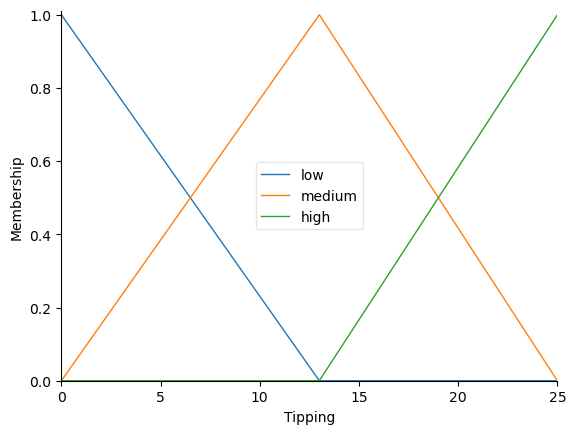

In [36]:
## Custom MemberShip Function (With Triangulaire Form)
# trimf: Triangulaire & trapmf: Trapezoïdal;
tip["low"] = fuzz.trimf(tip.universe, [0, 0, 13])
tip["medium"] = fuzz.trimf(tip.universe, [0, 13, 25])
tip["high"] = fuzz.trimf(tip.universe, [13, 25, 25])
tip.view()

In [37]:
## Custom MemberShip Function (With Trapezoïdale)
# Define foodQuality with 3 linguistic variables & universe [0, 10]
foodQuality['bad'] = fuzz.trapmf(foodQuality.universe, [0, 0, 2, 4])
foodQuality['decent'] = fuzz.trapmf(foodQuality.universe, [3, 5, 6, 8])
foodQuality['great'] = fuzz.trapmf(foodQuality.universe, [7, 8, 10, 10])
# foodQuality.view()

# Define serviceQuality with 3 linguistic variables & universe [0, 10]
serviceQuality['poor'] = fuzz.trapmf(serviceQuality.universe, [0, 0, 2, 4])
serviceQuality['acceptable'] = fuzz.trapmf(serviceQuality.universe, [3, 5, 6, 8])
serviceQuality['amazing'] = fuzz.trapmf(serviceQuality.universe, [7, 8, 10, 10])
# serviceQuality.view()

# Define Tipping with 3 linguistic variables & universe [0, 10]
tip['low'] = fuzz.trapmf(tip.universe, [0, 0, 3, 5])
tip['medium'] = fuzz.trapmf(tip.universe, [4, 5, 6, 8])
tip['high'] = fuzz.trapmf(tip.universe, [7, 8, 10, 10])
# tip.view()


In [ ]:
## Define Rules
# in Rule: | <--> OR & <--> AND
rule1 = ctrl.Rule(serviceQuality['amazing'] | foodQuality['great'], tip['high'])
rule2 = ctrl.Rule(serviceQuality['acceptable'], tip['medium'])
rule3 = ctrl.Rule(serviceQuality['poor'] | foodQuality['bad'], tip['low'])


In [40]:
## Create Control System [Agregation]
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [41]:
## Simulate Control System [Defuzzification ---> generate one crisp number]
tipping = ctrl.ControlSystemSimulation(tipping_ctrl, clip_to_bounds=True)

7
9
Food Qualitiy = 7, Service Qualitiy = 9     => Tipping = 9.000000000000002


/home/abdellah/.local/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


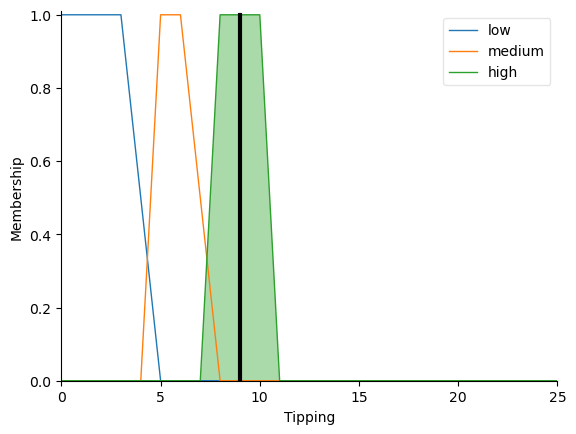

In [ ]:
## Test
nFoodQual = np.random.randint(0, 11)
nServiceQual = np.random.randint(0, 11)

tipping.input['foodQuality'] = nFoodQual
tipping.input['serviceQuality'] = nServiceQual
tipping.compute() # Calcute the Output

print(f"Food Qualitiy = {nFoodQual}, Service Qualitiy = {nServiceQual} \
    => Tipping = {tipping.output["Tipping"]}")

tip.view(sim=tipping)